In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['figure.dpi'] = 80 # 200 e.g. is really fine, but slower
# plt.rcParams['font.size'] = 45
plt.rcParams['font.size'] = 40

In [3]:
import numpy as np

In [4]:
import main
import utils.eval_utils as eval_utils
import utils.vis_utils as vis_utils
import imageio

In [5]:
num_models = 1

### Open-loop - Ellipse

In [6]:
# Find the reference trajectory
ref_ellipse = eval_utils.generate_ellipse_reference(
    main.open_loop_sim_params['ellipse_axes'], 
    main.open_loop_sim_params['dt'],
    main.open_loop_sim_params['Tref'],
    main.open_loop_sim_params['ref_ang_vel']
)
nominal_traj = np.load(f'./results/open-loop/x_traj_ellipse_nominal.npy')
nominal_error = np.linalg.norm(nominal_traj[:-1, :2] - ref_ellipse[:, :2].numpy(), axis=-1).mean()
print(f"Nominal flat map error:\t{nominal_error:.5f}")
true_traj = np.load(f'./results/open-loop/x_traj_ellipse_true.npy')
true_error = np.linalg.norm(true_traj[:-1, :2] - ref_ellipse[:, :2].numpy(), axis=-1).mean()
print(f"True flat map error:\t{true_error:.5f}")

learned_errors = []
for idx in range(num_models):
    learned_traj = np.load(f'./results/open-loop/x_traj_ellipse_learned_{idx}.npy')
    learned_errors.append(np.linalg.norm(learned_traj[:-1, :2] - ref_ellipse[:, :2].numpy(), axis=-1).mean())
print(
    '-'*30 + "\nLearned Flat maps\n"
    f"Mean tracking error:\t{np.mean(learned_errors):.5f}\n"
    f"Standard deviation:\t{np.std(learned_errors):.5f}"
)
# _ = plt.hist(learned_errors)

Nominal flat map error:	0.31232
True flat map error:	0.00000
------------------------------
Learned Flat maps
Mean tracking error:	0.04007
Standard deviation:	0.00000


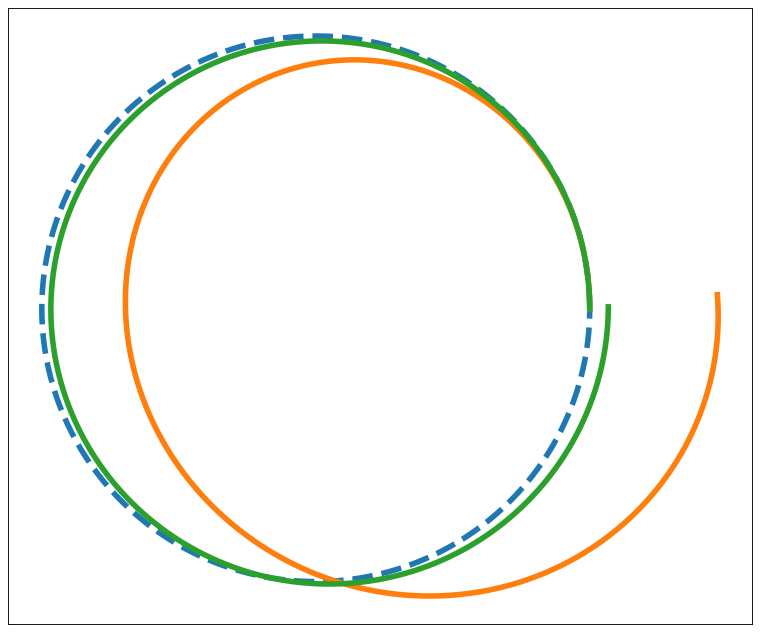

In [7]:
# Plot representative trajectory
idx = 0
learned_traj = np.load(f'./results/open-loop/x_traj_ellipse_learned_{idx}.npy')
plt.figure(figsize=(12, 10))
plt.plot(ref_ellipse[:, 0], ref_ellipse[:, 1], '--', label='reference', linewidth=5)
plt.plot(nominal_traj[:, 0], nominal_traj[:, 1], label='nominal', linewidth=5)
# plt.plot(true_traj[:, 0], true_traj[:, 1], label='true', linewidth=5)
plt.plot(learned_traj[:, 0], learned_traj[:, 1], label='learned', linewidth=5)
plt.xticks([]); plt.yticks([])
# plt.legend()
plt.savefig('./results/open-loop/ol-ellipse.png', bbox_inches='tight', pad_inches=0)

In [8]:
interval = 30
images = []
xlim = [-1.3, 1.5]
ylim = [-1.4, 1.4]

fig = plt.figure(figsize=(12, 10))
for t in range(0, learned_traj.shape[0], interval):
    plt.clf()
    plt.plot(ref_ellipse[:, 0], ref_ellipse[:, 1], '--', label='reference', linewidth=5)
    plt.plot(learned_traj[:t, 0], learned_traj[:t, 1], label='learned', linewidth=5)
    plt.plot(nominal_traj[:t, 0], nominal_traj[:t, 1], label='nominal', linewidth=5)
    vis_utils.draw_quadrotor(learned_traj[t], color='C1', thickness=3, exaggerate_theta=5)
    vis_utils.draw_quadrotor(nominal_traj[t], color='C2', thickness=3, exaggerate_theta=5)
    plt.axis('equal')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks([]); plt.yticks([])
    plt.savefig('./results/temp.png', bbox_inches='tight', pad_inches=0)
    images.append(imageio.imread('./results/temp.png'))
plt.close(fig)
imageio.mimsave('./results/open-loop/ellipse.gif', images, fps=10, loop=0)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
/tmp/ipykernel_2365311/3070209240.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./results/temp.png'))
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


### Open-loop - Lemniscate

In [9]:
ref_lem = eval_utils.generate_lemniscate_reference(
    main.open_loop_sim_params['lemniscate_axes'], 
    main.open_loop_sim_params['dt'],
    main.open_loop_sim_params['Tref'],
    main.open_loop_sim_params['ref_ang_vel']
)
nominal_traj = np.load(f'./results/open-loop/x_traj_lem_nominal.npy')
nominal_error = np.linalg.norm(nominal_traj[:-1, :2] - ref_lem[:, :2].numpy(), axis=-1).mean()
print(f"Nominal flat map error:\t{nominal_error:.5f}")
true_traj = np.load(f'./results/open-loop/x_traj_lem_true.npy')
true_error = np.linalg.norm(true_traj[:-1, :2] - ref_lem[:, :2].numpy(), axis=-1).mean()
print(f"True flat map error:\t{true_error:.5f}")

learned_errors = []
for idx in range(num_models):
    learned_traj = np.load(f'./results/open-loop/x_traj_lem_learned_{idx}.npy')
    learned_errors.append(np.linalg.norm(learned_traj[:-1, :2] - ref_lem[:, :2].numpy(), axis=-1).mean())
print(
    '-'*30 + "\nLearned Flat maps\n"
    f"Mean tracking error:\t{np.mean(learned_errors):.5f}\n"
    f"Standard deviation:\t{np.std(learned_errors):.5f}"
)
# _ = plt.hist(learned_errors)

Nominal flat map error:	0.23823
True flat map error:	0.00000
------------------------------
Learned Flat maps
Mean tracking error:	0.03443
Standard deviation:	0.00000


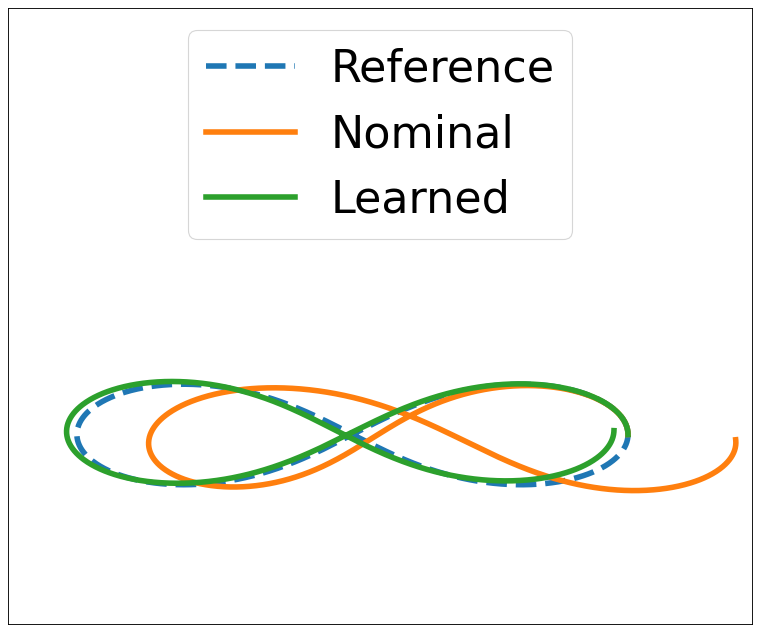

In [10]:
# Plot representative trajectory
idx = 0
learned_traj = np.load(f'./results/open-loop/x_traj_lem_learned_{idx}.npy')
plt.figure(figsize=(12, 10))
plt.plot(ref_lem[:, 0], ref_lem[:, 1], '--', label='Reference', linewidth=5)
plt.plot(nominal_traj[:, 0], nominal_traj[:, 1], label='Nominal', linewidth=5)
# plt.plot(true_traj[:, 0], true_traj[:, 1], label='true', linewidth=5)
plt.plot(learned_traj[:, 0], learned_traj[:, 1], label='Learned', linewidth=5)
plt.xticks([]); plt.yticks([])
plt.xlim([-1.25, 1.45])
plt.ylim([-0.8, 1.8])
plt.legend(loc='upper center')
plt.savefig('./results/open-loop/ol-lem.png', bbox_inches='tight', pad_inches=0)

In [11]:
interval = 30
images = []
xlim = [-1.25, 1.45]
ylim = [-0.8, 1.8]

fig = plt.figure(figsize=(12, 10))
for t in range(0, learned_traj.shape[0], interval):
    plt.clf()
    plt.plot(ref_lem[:, 0], ref_lem[:, 1], '--', label='reference', linewidth=5)
    plt.plot(learned_traj[:t, 0], learned_traj[:t, 1], label='learned', linewidth=5)
    plt.plot(nominal_traj[:t, 0], nominal_traj[:t, 1], label='nominal', linewidth=5)
    vis_utils.draw_quadrotor(learned_traj[t], color='C1', thickness=3, exaggerate_theta=5)
    vis_utils.draw_quadrotor(nominal_traj[t], color='C2', thickness=3, exaggerate_theta=5)
    plt.axis('equal')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks([]); plt.yticks([])
    plt.legend(loc='upper center')
    plt.savefig('./results/temp.png', bbox_inches='tight', pad_inches=0)
    images.append(imageio.imread('./results/temp.png'))
plt.close(fig)
imageio.mimsave('./results/open-loop/lem.gif', images, fps=10, loop=0)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
/tmp/ipykernel_2365311/1947109520.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./results/temp.png'))
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


### Closed-loop - Ellipse

In [12]:
# Find the reference trajectory
ref_ellipse = eval_utils.generate_ellipse_reference(
    main.closed_loop_sim_params['ellipse_axes'], 
    main.closed_loop_sim_params['dt'],
    main.closed_loop_sim_params['Tref'],
    main.closed_loop_sim_params['ref_ang_vel']
)
nominal_errors, learned_errors, nmpc_errors = [], [], []
for idx in range(num_models):
    nominal_traj = np.load(f'./results/closed-loop/x_traj_ellipse_flat_nominal_{idx}.npy')
    learned_traj = np.load(f'./results/closed-loop/x_traj_ellipse_flat_learned_{idx}.npy')
    nmpc_traj = np.load(f'./results/closed-loop/x_traj_ellipse_mpc_{idx}.npy')
    nominal_errors.append(np.linalg.norm(nominal_traj[:-1, :2] - ref_ellipse[:, :2].numpy(), axis=-1).mean())
    learned_errors.append(np.linalg.norm(learned_traj[:-1, :2] - ref_ellipse[:, :2].numpy(), axis=-1).mean())
    nmpc_errors.append(np.linalg.norm(nmpc_traj[:-1, :2] - ref_ellipse[:, :2].numpy(), axis=-1).mean())
print(
    "Nominal Flat maps\n"
    f"Mean tracking error:\t{np.mean(nominal_errors):.5f}\n"
    f"Standard deviation:\t{np.std(nominal_errors):.5f}"
)
print(
    '-'*30 + "\nLearned Flat maps\n"
    f"Mean tracking error:\t{np.mean(learned_errors):.5f}\n"
    f"Standard deviation:\t{np.std(learned_errors):.5f}"
)
print(
    '-'*30 + "\nNMPC\n"
    f"Mean tracking error:\t{np.mean(nmpc_errors):.5f}\n"
    f"Standard deviation:\t{np.std(nmpc_errors):.5f}"
)

Nominal Flat maps
Mean tracking error:	0.04949
Standard deviation:	0.00000
------------------------------
Learned Flat maps
Mean tracking error:	0.00787
Standard deviation:	0.00000
------------------------------
NMPC
Mean tracking error:	0.00810
Standard deviation:	0.00000


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


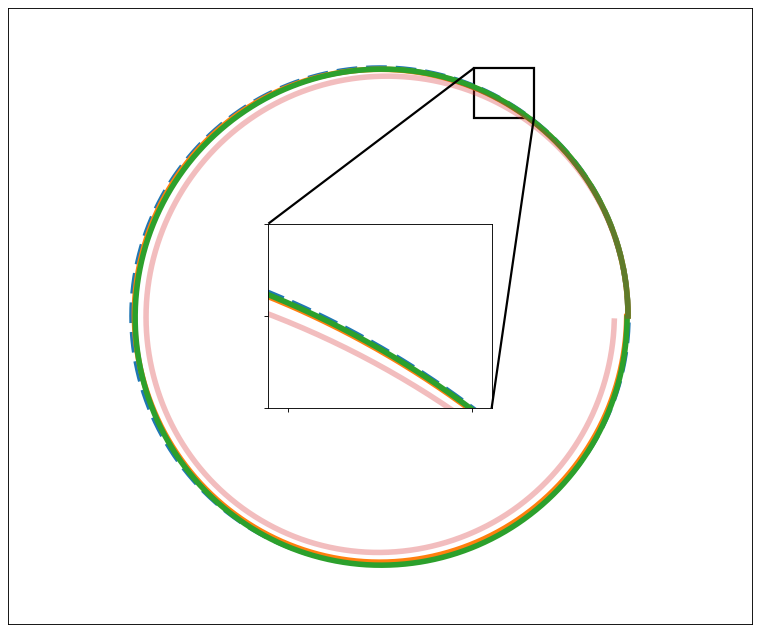

In [13]:
# Plot representative trajectory
idx = 0
nominal_traj = np.load(f'./results/closed-loop/x_traj_ellipse_flat_nominal_{idx}.npy')
learned_traj = np.load(f'./results/closed-loop/x_traj_ellipse_flat_learned_{idx}.npy')
nmpc_traj = np.load(f'./results/closed-loop/x_traj_ellipse_mpc_{idx}.npy')
plt.figure(figsize=(12, 10))
plt.plot(ref_ellipse[:, 0], ref_ellipse[:, 1], '--', label='reference', linewidth=5)
plt.plot(learned_traj[:, 0], learned_traj[:, 1], label='flat-learned', linewidth=5)
plt.plot(nmpc_traj[:, 0], nmpc_traj[:, 1], label='NMPC', linewidth=5)
plt.plot(nominal_traj[:, 0], nominal_traj[:, 1], label='flat-nominal', alpha=0.3, linewidth=5)
plt.xticks([]); plt.yticks([])
plt.axis('equal')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

ax = plt.gca()
axins = inset_axes(ax, width="30%", height="30%", loc="center")
axins.plot(ref_ellipse[:, 0], ref_ellipse[:, 1], '--', label='reference', linewidth=5)
axins.plot(learned_traj[:, 0], learned_traj[:, 1], label='flat-learned', linewidth=5)
axins.plot(nmpc_traj[:, 0], nmpc_traj[:, 1], label='NMPC', linewidth=5)
axins.plot(nominal_traj[:, 0], nominal_traj[:, 1], label='flat-nominal', alpha=0.3, linewidth=5)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.axis('equal')
axins.set_xlim(0.4, 0.6)
axins.set_ylim(0.8, 1.0)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black", linewidth=2)

# plt.legend()
plt.savefig('./results/open-loop/cl-ellipse.png', bbox_inches='tight', pad_inches=0)

In [14]:
interval = 30
images = []
xlim = [-1.5, 1.5]
ylim = [-1.5, 1.5]

fig = plt.figure(figsize=(12, 10))
for t in range(0, learned_traj.shape[0], interval):
    plt.clf()
    plt.plot(ref_ellipse[:, 0], ref_ellipse[:, 1], '--', label='reference', linewidth=5)
    plt.plot(learned_traj[:t, 0], learned_traj[:t, 1], label='flat-learned', linewidth=5)
    plt.plot(nmpc_traj[:t, 0], nmpc_traj[:t, 1], label='nmpc', linewidth=5)
    plt.plot(nominal_traj[:t, 0], nominal_traj[:t, 1], label='flat-nominal', alpha=0.3, linewidth=5)
    vis_utils.draw_quadrotor(learned_traj[t], color='C1', thickness=3, exaggerate_theta=5)
    vis_utils.draw_quadrotor(nmpc_traj[t], color='C2', thickness=3, exaggerate_theta=5)
    vis_utils.draw_quadrotor(nominal_traj[t], color='C3', thickness=3, alpha=0.3, exaggerate_theta=5)
    plt.axis('equal')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks([]); plt.yticks([])
    plt.savefig('./results/temp.png', bbox_inches='tight', pad_inches=0)
    images.append(imageio.imread('./results/temp.png'))
for _ in range(10):
    images.append(imageio.imread("./results/open-loop/cl-ellipse.png"))
plt.close(fig)
imageio.mimsave('./results/closed-loop/ellipse.gif', images, fps=10, loop=0)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
/tmp/ipykernel_2365311/1550489794.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./results/temp.png'))
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


### Closed-loop - Lemniscate

In [15]:
# Find the reference trajectory
ref_lem = eval_utils.generate_lemniscate_reference(
    main.closed_loop_sim_params['lemniscate_axes'], 
    main.closed_loop_sim_params['dt'],
    main.closed_loop_sim_params['Tref'],
    main.closed_loop_sim_params['ref_ang_vel']
)
nominal_errors, learned_errors, nmpc_errors = [], [], []
for idx in range(num_models):
    nominal_traj = np.load(f'./results/closed-loop/x_traj_lem_flat_nominal_{idx}.npy')
    learned_traj = np.load(f'./results/closed-loop/x_traj_lem_flat_learned_{idx}.npy')
    nmpc_traj = np.load(f'./results/closed-loop/x_traj_lem_mpc_{idx}.npy')
    nominal_errors.append(np.linalg.norm(nominal_traj[:-1, :2] - ref_lem[:, :2].numpy(), axis=-1).mean())
    learned_errors.append(np.linalg.norm(learned_traj[:-1, :2] - ref_lem[:, :2].numpy(), axis=-1).mean())
    nmpc_errors.append(np.linalg.norm(nmpc_traj[:-1, :2] - ref_lem[:, :2].numpy(), axis=-1).mean())
print(
    "Nominal Flat maps\n"
    f"Mean tracking error:\t{np.mean(nominal_errors):.5f}\n"
    f"Standard deviation:\t{np.std(nominal_errors):.5f}"
)
print(
    '-'*30 + "\nLearned Flat maps\n"
    f"Mean tracking error:\t{np.mean(learned_errors):.5f}\n"
    f"Standard deviation:\t{np.std(learned_errors):.5f}"
)
print(
    '-'*30 + "\nNMPC\n"
    f"Mean tracking error:\t{np.mean(nmpc_errors):.5f}\n"
    f"Standard deviation:\t{np.std(nmpc_errors):.5f}"
)

Nominal Flat maps
Mean tracking error:	0.02702
Standard deviation:	0.00000
------------------------------
Learned Flat maps
Mean tracking error:	0.00429
Standard deviation:	0.00000
------------------------------
NMPC
Mean tracking error:	0.00725
Standard deviation:	0.00000


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


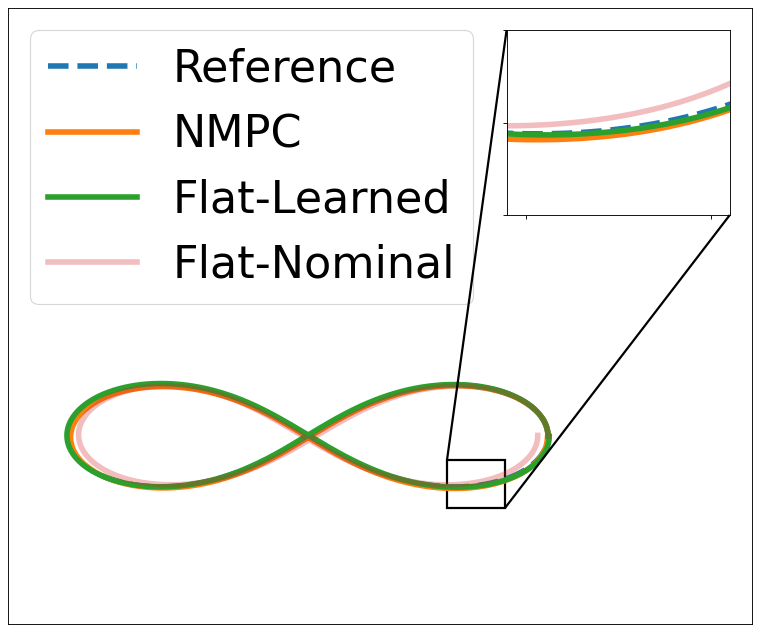

In [16]:
# Plot representative trajectory
idx = 0
nominal_traj = np.load(f'./results/closed-loop/x_traj_lem_flat_nominal_{idx}.npy')
learned_traj = np.load(f'./results/closed-loop/x_traj_lem_flat_learned_{idx}.npy')
nmpc_traj = np.load(f'./results/closed-loop/x_traj_lem_mpc_{idx}.npy')
plt.figure(figsize=(12, 10))
plt.plot(ref_lem[:, 0], ref_lem[:, 1], '--', label='Reference', linewidth=5)
# plt.plot(learned_traj[:, 0], learned_traj[:, 1], label='Flatness', linewidth=5)
plt.plot(nmpc_traj[:, 0], nmpc_traj[:, 1], label='NMPC', linewidth=5)
plt.plot(learned_traj[:, 0], learned_traj[:, 1], label='Flat-Learned', linewidth=5)
plt.plot(nominal_traj[:, 0], nominal_traj[:, 1], label='Flat-Nominal', alpha=0.3, linewidth=5)
plt.xticks([]); plt.yticks([])
plt.axis('equal')
plt.xlim([-1.25, 1.85])
plt.ylim([-0.8, 1.8])
plt.legend(loc='upper left')

ax = plt.gca()
axins = inset_axes(ax, width="30%", height="30%", loc="upper right")
axins.plot(ref_lem[:, 0], ref_lem[:, 1], '--', label='reference', linewidth=5)
# axins.plot(learned_traj[:, 0], learned_traj[:, 1], label='Flatness', linewidth=5)
axins.plot(nmpc_traj[:, 0], nmpc_traj[:, 1], label='NMPC', linewidth=5)
axins.plot(learned_traj[:, 0], learned_traj[:, 1], label='Flat-Learned', linewidth=5)
axins.plot(nominal_traj[:, 0], nominal_traj[:, 1], label='Flat-Nominal', alpha=0.3, linewidth=5)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.axis('equal')
axins.set_xlim(0.6, 0.8)
axins.set_ylim(-0.3, -0.1)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black", linewidth=2)


plt.savefig('./results/open-loop/cl-lem.png', bbox_inches='tight', pad_inches=0)

In [17]:
interval = 30
images = []
xlim = [-1.25, 1.85]
ylim = [-0.8, 1.8]

fig = plt.figure(figsize=(12, 10))
for t in range(0, learned_traj.shape[0], interval):
    plt.clf()
    plt.plot(ref_lem[:, 0], ref_lem[:, 1], '--', label='Reference', linewidth=5)
    plt.plot(learned_traj[:t, 0], learned_traj[:t, 1], label='Flat-Learned', linewidth=5)
    plt.plot(nmpc_traj[:t, 0], nmpc_traj[:t, 1], label='NMPC', linewidth=5)
    plt.plot(nominal_traj[:t, 0], nominal_traj[:t, 1], label='Flat-Nominal', alpha=0.3, linewidth=5)
    vis_utils.draw_quadrotor(learned_traj[t], color='C1', thickness=3, exaggerate_theta=5)
    vis_utils.draw_quadrotor(nmpc_traj[t], color='C2', thickness=3, exaggerate_theta=5)
    vis_utils.draw_quadrotor(nominal_traj[t], color='C2', thickness=3, alpha=0.3, exaggerate_theta=5)
    plt.axis('equal')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks([]); plt.yticks([])
    plt.legend(loc='upper left')
    plt.savefig('./results/temp.png', bbox_inches='tight', pad_inches=0)
    images.append(imageio.imread('./results/temp.png'))
for _ in range(10):
    images.append(imageio.imread("./results/open-loop/cl-lem.png"))
plt.close(fig)
imageio.mimsave('./results/closed-loop/lem.gif', images, fps=10, loop=0)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
/tmp/ipykernel_2365311/2997855379.py:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./results/temp.png'))
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


### Compute time

In [18]:
flat_time, mpc_time = [], []
for i in range(num_models):
    flat_time += [
        np.load(f'./results/closed-loop/time_ellipse_flat_learned_{i}.npy'),
        np.load(f'./results/closed-loop/time_lem_flat_learned_{i}.npy')
    ]
    mpc_time += [
        np.load(f'./results/closed-loop/time_ellipse_mpc_{i}.npy'),
        np.load(f'./results/closed-loop/time_lem_mpc_{i}.npy')
    ]

In [19]:
flat_time = np.array(flat_time).flatten()
# mpc_time = np.array(mpc_time)[:, 1:].flatten()
mpc_time = np.array(mpc_time).flatten()

In [20]:
print(flat_time.mean(), flat_time.std())
print(mpc_time.mean(), mpc_time.std())

0.006818399088723319 0.00015551154900449754
0.18061686950070518 0.16659284424581017


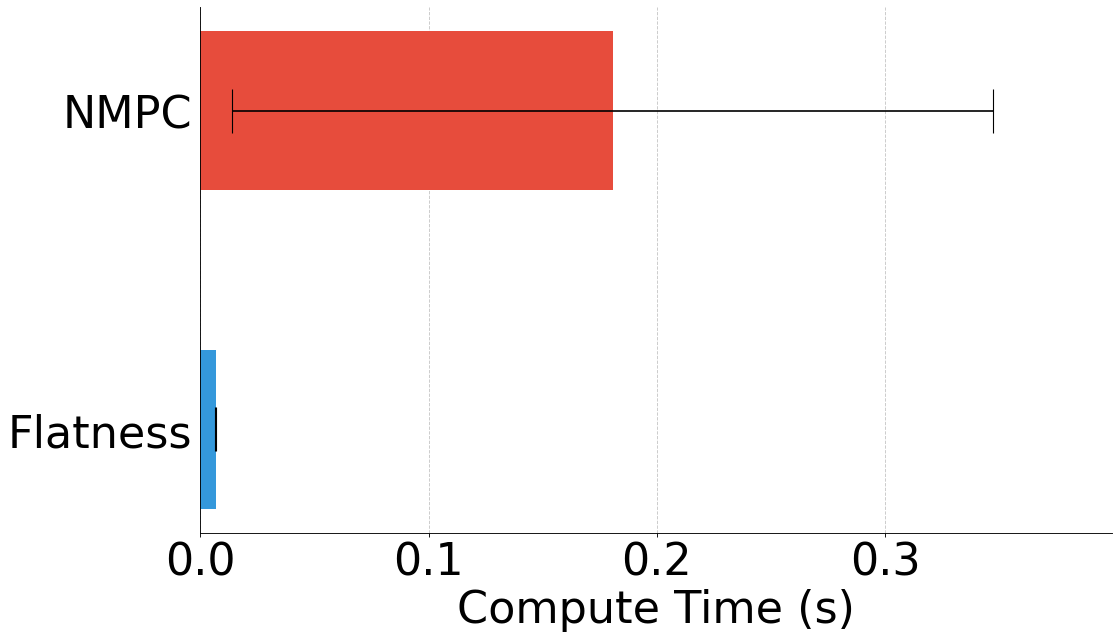

In [21]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 9))
categories = ['Flatness', 'NMPC']
values = [flat_time.mean(), mpc_time.mean()]
errors = [flat_time.std(), mpc_time.std()]


# Create horizontal bars with error bars
bars = ax.barh(categories, values, 
               xerr=errors,  # Add error bars
               color=['#3498db', '#e74c3c'],  # Different colors for each class
               height=0.5, 
               capsize=20)  # Adds horizontal caps to error bars
ax.set_xlabel('Compute Time (s)')

# # Customize the plot
# ax.set_xlabel('Measurement Value', fontsize=12, labelpad=10)
# ax.set_title('Comparison of Two Classes with Error Bars', fontsize=14, pad=20)
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # Grid lines behind bars

# # Remove spines (top and right)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)

# # Adjust xlim to give some padding for error bars
ax.set_xlim(0, max(np.array(values) + np.array(errors)) * 1.15)

# # Make y-axis labels more readable
ax.tick_params(axis='y', which='both', left=False)

plt.tight_layout()
plt.savefig('./results/open-loop/compute_time.png', bbox_inches='tight', pad_inches=0)